The dataset in this notebook is entitled "Metaverse Financial Transactions Dataset".

Link: https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset

This dataset provides a set of blockchain financial transaction information in the Open Metaverse. It includes the following columns: timestamp, hours of the day, sending address, receiving address, amount, transaction type, location region, IP prefix, login frequency, session duration, purchase pattern, age group, risk score, and anomaly. The dataset aims to support research and development in anomaly detection, fraud analysis, and behavioral modeling within virtual environments to study the security of these online financial transactions.

This dataset was shared by the Open Metaverse, an expensive virtual space that relies on blockchain technology to assure safe financial transactions and high-quality services.

I found the analysis of the financial transactions of any company to be a very interesting practice for future data scientists as it allows working on a real-life project. I am curious to know how risky or safe these transactions are based on many different criteria such as the location and the IP address.

In [ ]:
import pandas as pd
import sqlite3
meta=pd.read_csv("metaverse_transactions_dataset.csv")
meta.head()

timestamp  hour_of_day  \
0  2022-04-11 12:47:27           12   
1  2022-06-14 19:12:46           19   
2  2022-01-18 16:26:59           16   
3  2022-06-15 09:20:04            9   
4  2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address      amount transaction_type  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
4  0x6fdc047c2391615b3facd79b4588c7e9106e49f2  775.569344             sale   

  location_region  ip_prefix  login_frequency  session_duration  \
0          Europe    192.000                3                48   
1   South America    172.000                5                61   
2            Asia    192.168                3                74   
3   South America    172.000                8               111   
4          Africa    172.160                6               100   

  purchase_pattern    age_group  risk_score        anomaly  
0          focused  established       18.75       low_risk  
1          focused  established       25.00       low_risk  
2          focused  established       31.25       low_risk  
3       high_value      veteran       36.75       low_risk  
4       high_value      veteran       62.50  moderate_risk

# Importing data

In [ ]:
conn=sqlite3.connect("metaverse.db")
meta.to_sql('meta',conn,if_exists='replace',index=False)

78600

In [ ]:
import pandas as pd
meta=pd.read_sql_query("""SELECT * FROM meta""",'sqlite:///metaverse.db',parse_dates=['timestamp'])
meta.head()

timestamp  hour_of_day  \
0 2022-04-11 12:47:27           12   
1 2022-06-14 19:12:46           19   
2 2022-01-18 16:26:59           16   
3 2022-06-15 09:20:04            9   
4 2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address      amount transaction_type  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
4  0x6fdc047c2391615b3facd79b4588c7e9106e49f2  775.569344             sale   

  location_region  ip_prefix  login_frequency  session_duration  \
0          Europe    192.000                3                48   
1   South America    172.000                5                61   
2            Asia    192.168                3                74   
3   South America    172.000                8               111   
4          Africa    172.160                6               100   

  purchase_pattern    age_group  risk_score        anomaly  
0          focused  established       18.75       low_risk  
1          focused  established       25.00       low_risk  
2          focused  established       31.25       low_risk  
3       high_value      veteran       36.75       low_risk  
4       high_value      veteran       62.50  moderate_risk

# Transaction type distribution in all the locations

In [ ]:
conn=sqlite3.connect('metaverse.db')
cursor=conn.cursor()
query1="""SELECT location_region, COUNT(location_region) AS Phishing FROM meta WHERE transaction_type='phishing' GROUP BY location_region """

query2="""SELECT  COUNT(location_region) AS Sale FROM meta WHERE transaction_type='sale' GROUP BY location_region """

query3="""SELECT COUNT(location_region) AS Scam FROM meta WHERE transaction_type='scam' GROUP BY location_region """

query4="""SELECT COUNT(location_region) AS Transfer FROM meta WHERE transaction_type='transfer' GROUP BY location_region """

query5="""SELECT COUNT(location_region) AS Purchase FROM meta WHERE transaction_type='purchase' GROUP BY location_region """

table1=pd.read_sql_query(query1,conn)
table2=pd.read_sql_query(query2,conn)
table3=pd.read_sql_query(query3,conn)
table4=pd.read_sql_query(query4,conn)
table5=pd.read_sql_query(query5,conn)
table=pd.concat([table1,table2,table3,table4,table5],axis=1)
table
cursor.close()
conn.close()

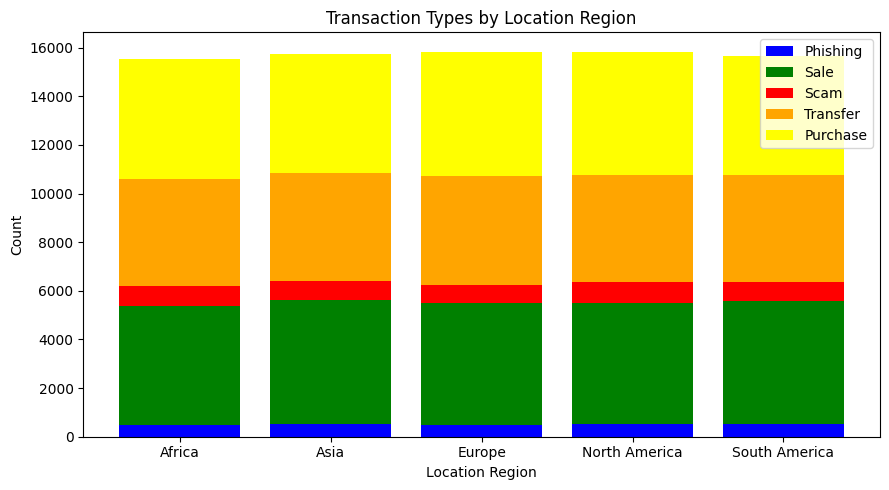

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

table.set_index('location_region', inplace=True)

fig, ax = plt.subplots(figsize=(9, 5))

x = range(len(table1.index))

bottom = [0] * len(table1.index)
colors = ['blue', 'green', 'red', 'orange', 'yellow']

for i, col in enumerate(table.columns):
    ax.bar(x, table[col], bottom=bottom, label=col, color=colors[i])
    bottom = [bottom[j] + table[col][j] for j in range(len(table.index))]

ax.set_xticks(x)
ax.set_xticklabels(table.index)
ax.set_xlabel('Location Region')
ax.set_ylabel('Count')
ax.set_title('Transaction Types by Location Region')
ax.legend()

plt.tight_layout()
plt.show()


#Risk rate distribution in all the locations

In [ ]:
conn=sqlite3.connect("metaverse.db")
cursor=conn.cursor()
query_a="""SELECT location_region, COUNT(anomaly) as low_risk FROM meta WHERE anomaly='low_risk' GROUP BY location_region"""

query_b="""SELECT COUNT(anomaly) as moderate_risk FROM meta WHERE anomaly='moderate_risk' GROUP BY location_region"""

query_c="""SELECT COUNT(anomaly) as high_risk FROM meta WHERE anomaly='high_risk' GROUP BY location_region"""
result_a=pd.read_sql_query(query_a,conn)
result_b=pd.read_sql_query(query_b,conn)
result_c=pd.read_sql_query(query_c,conn)
table2=pd.concat([result_a,result_b,result_c],axis=1)
table2

location_region  low_risk  moderate_risk  high_risk
0          Africa     12575           1675       1303
1            Asia     12712           1707       1312
2          Europe     12817           1757       1233
3   North America     12774           1712       1354
4   South America     12616           1760       1293

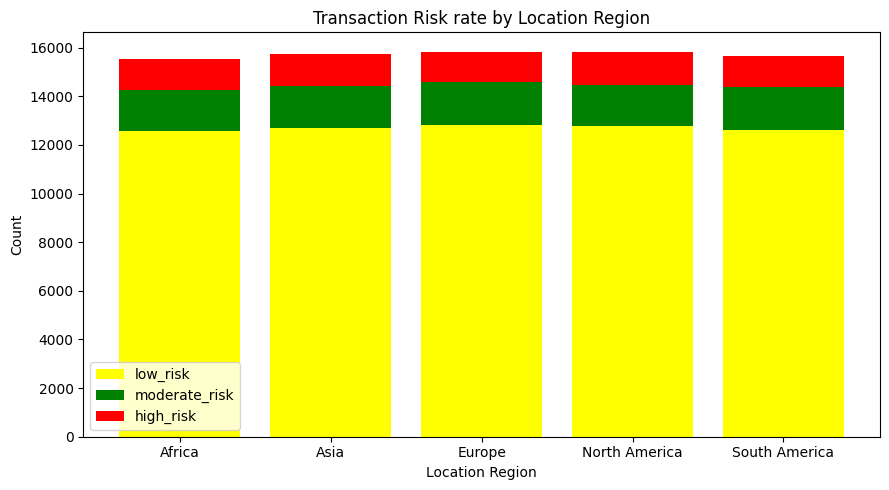

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

table2.set_index('location_region', inplace=True)

fig, ax = plt.subplots(figsize=(9, 5))

x = range(len(table2.index))

bottom = [0] * len(table2.index)
colors = ['yellow', 'green', 'red']

for i, col in enumerate(table2.columns):
    ax.bar(x, table2[col], bottom=bottom, label=col, color=colors[i])
    bottom = [bottom[j] + table2[col][j] for j in range(len(table2.index))]

ax.set_xticks(x)
ax.set_xticklabels(table2.index)
ax.set_xlabel('Location Region')
ax.set_ylabel('Count')
ax.set_title('Transaction Risk rate by Location Region')
ax.legend()


plt.tight_layout()
plt.show()


#Risk score vs transaction type

In [ ]:
conn=sqlite3.connect("metaverse.db")
cursor=conn.cursor()
query="""SELECT transaction_type, AVG(risk_score) as risk_score, AVG(login_frequency) as average_login_frequency
FROM meta GROUP BY transaction_type ORDER BY AVG(risk_score) DESC"""
result=pd.read_sql_query(query,conn)
result


transaction_type  risk_score  average_login_frequency
0         phishing  100.000000                 1.500393
1             scam   96.194733                 1.500886
2             sale   56.493773                 5.579872
3         purchase   33.086762                 3.335285
4         transfer   29.800563                 4.329808

#Average log in frequency vs transaction type

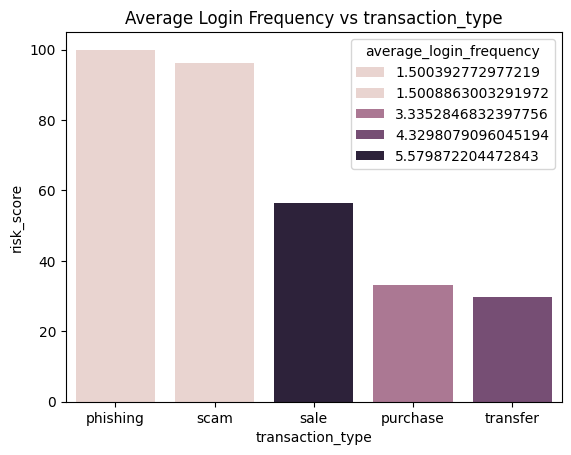

In [ ]:
#result.plot.bar(x='transaction_type',y='risk_score',rot=0)
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=result, x='transaction_type', y='risk_score', hue='average_login_frequency')
plt.title('Average Login Frequency vs transaction_type')
plt.show()


#Average Login Frequency vs transaction risk

In [ ]:
conn=sqlite3.connect("metaverse.db")
curosr=conn.cursor()
query="""SELECT AVG(amount) as average_amount, anomaly FROM meta GROUP BY anomaly"""
result=pd.read_sql_query(query,conn)
result

average_amount        anomaly
0      495.352890      high_risk
1      486.214159       low_risk
2      628.659679  moderate_risk

In [ ]:
conn=sqlite3.connect("metaverse.db")
cursor=conn.cursor()
query="""SELECT anomaly, AVG(login_frequency) as average_login_frequency,AVG(risk_score),AVG(hour_of_day) as average_hours_of_day FROM meta GROUP BY anomaly ORDER BY AVG(risk_score) DESC"""
result=pd.read_sql_query(query,conn)
result

anomaly  average_login_frequency  AVG(risk_score)  \
0      high_risk                 1.500693        97.686374   
1  moderate_risk                 6.757984        69.200427   
2       low_risk                 4.102844        36.274932   

   average_hours_of_day  
0             11.641109  
1              7.012426  
2             12.134564

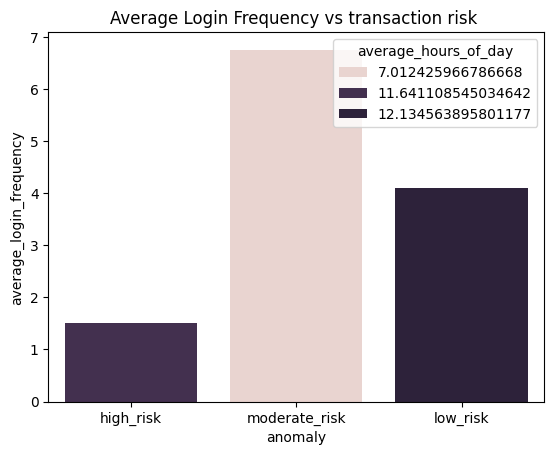

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=result, x='anomaly', y='average_login_frequency', hue='average_hours_of_day')
plt.title('Average Login Frequency vs transaction risk ')
plt.show()


In [ ]:
conn=sqlite3.connect("metaverse.db")
cursor=conn.cursor()
query="""SELECT age_group FROM meta GROUP BY age_group"""
result=pd.read_sql_query(query,conn)
result

age_group
0  established
1          new
2      veteran

#Age group and risk score

In [ ]:
conn=sqlite3.connect("metaverse.db")
cursor=conn.cursor()
query1="""SELECT location_region, COUNT(age_group) as established  FROM meta WHERE age_group='established' GROUP BY location_region"""
query2="""SELECT  COUNT(age_group) as new  FROM meta WHERE age_group='new' GROUP BY location_region"""
query3="""SELECT  COUNT(age_group) as veteran  FROM meta WHERE age_group='veteran' GROUP BY location_region"""

result1=pd.read_sql_query(query1,conn)
result2=pd.read_sql_query(query2,conn)
result3=pd.read_sql_query(query3,conn)

table=pd.concat([result1,result2,result3],axis=1)
table

location_region  established   new  veteran
0          Africa         5187  5166     5200
1            Asia         5180  5267     5284
2          Europe         5378  5161     5268
3   North America         5184  5347     5309
4   South America         5104  5204     5361

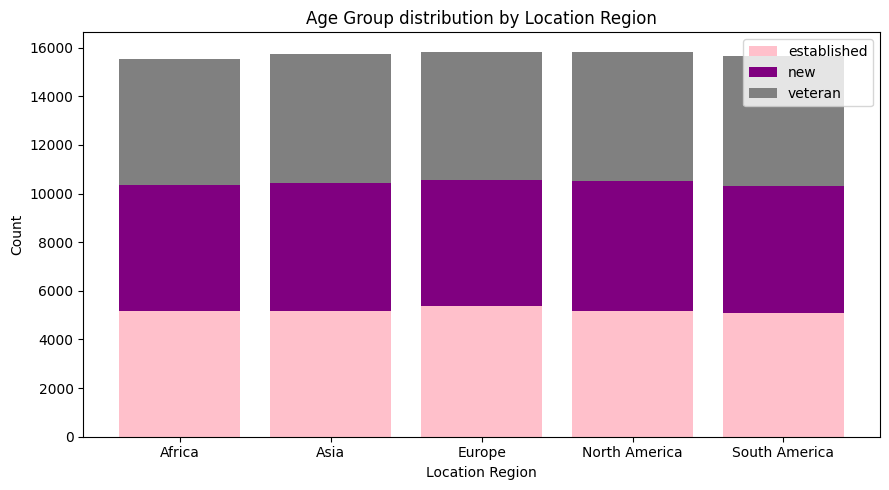

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize=(9, 5))

table.set_index('location_region', inplace=True)

x = range(len(table.index))

bottom = [0] * len(table.index)
colors = ['pink', 'purple', 'grey']

for i, col in enumerate(table.columns):
    ax.bar(x, table[col], bottom=bottom, label=col, color=colors[i])
    bottom = [bottom[j] + table[col][j] for j in range(len(table.index))]

ax.set_xticks(x)
ax.set_xticklabels(table.index)
ax.set_xlabel('Location Region')
ax.set_ylabel('Count')
ax.set_title('Age Group distribution by Location Region')
ax.legend()


plt.tight_layout()
plt.show()


In [ ]:
conn=sqlite3.connect('metaverse.db')
cursor=conn.cursor()
query="""SELECT risk_score, amount, age_group FROM meta """
result=pd.read_sql_query(query,conn)
result

risk_score      amount    age_group
0         18.7500  796.949206  established
1         25.0000    0.010000  established
2         31.2500  778.197390  established
3         36.7500  300.838358      veteran
4         62.5000  775.569344      veteran
...           ...         ...          ...
78595     26.2500  660.280373          new
78596     26.2500  310.273397  established
78597     36.7500  624.674332          new
78598     35.4375  401.391592  established
78599     15.7500  523.947956  established

[78600 rows x 3 columns]

In [ ]:
from plotly import express
express.histogram(data_frame=result,x='amount',y='risk_score',color='age_group')

#Impact of having the transaction sending adress similar to the receiving adress

In [ ]:
conn=sqlite3.connect("metaverse.db")
cursor=conn.cursor()
query="""SELECT sending_address, anomaly,location_region, risk_score FROM meta WHERE sending_address=receiving_address ORDER BY risk_score DESC"""
result=pd.read_sql_query(query,conn)
result

sending_address    anomaly location_region  \
0   0x59210cfbe55112628df91eee78c3bc0ae30aceb9  high_risk   North America   
1   0x85325abae53326a0850a742bbd664db8ae29d3b9  high_risk   South America   
2   0x85325abae53326a0850a742bbd664db8ae29d3b9  high_risk          Europe   
3   0x85325abae53326a0850a742bbd664db8ae29d3b9  high_risk          Africa   
4   0xd1cfa6e0a84c1866bc2348a366c41c608791e611  high_risk   South America   
..                                         ...        ...             ...   
82  0x85325abae53326a0850a742bbd664db8ae29d3b9   low_risk          Europe   
83  0xd1cfa6e0a84c1866bc2348a366c41c608791e611   low_risk          Africa   
84  0xd1cfa6e0a84c1866bc2348a366c41c608791e611   low_risk          Europe   
85  0x59210cfbe55112628df91eee78c3bc0ae30aceb9   low_risk            Asia   
86  0x59210cfbe55112628df91eee78c3bc0ae30aceb9   low_risk          Europe   

    risk_score  
0       100.00  
1       100.00  
2       100.00  
3        94.50  
4        94.50  
..         ...  
82       15.75  
83       15.75  
84       15.75  
85       15.75  
86       15.00  

[87 rows x 4 columns]

In [ ]:
result.describe()
#the average risk_score is below 50% which means that when the sending adress equals the receiving adress during the transaction does not highly impact its safety

risk_score
count   87.000000
mean    45.641379
std     21.607772
min     15.000000
25%     28.750000
50%     43.750000
75%     52.500000
max    100.000000

#Hours of day impact on risk_score

In [ ]:
conn=sqlite3.connect('metaverse.db')
cursor=conn.cursor()
query="""SELECT hour_of_day, risk_score FROM meta ORDER BY hour_of_day ASC"""
result=pd.read_sql_query(query,conn)
result

hour_of_day  risk_score
0                0     70.8750
1                0     54.0000
2                0     47.2500
3                0     59.0625
4                0     33.7500
...            ...         ...
78595           23     31.2500
78596           23     15.7500
78597           23     26.2500
78598           23     26.2500
78599           23     15.0000

[78600 rows x 2 columns]

<Axes: xlabel='hour_of_day'>

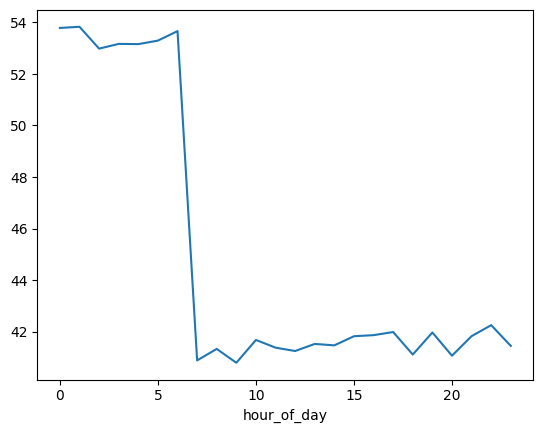

In [ ]:
result.groupby('hour_of_day')['risk_score'].mean().plot(kind='line')


In [ ]:
conn=sqlite3.connect('metaverse.db')
cursor=conn.cursor()
query="""SELECT timestamp, risk_score as risk_score,location_region FROM meta """
result=pd.read_sql_query(query,conn)
result

timestamp  risk_score location_region
0      2022-04-11 12:47:27     18.7500          Europe
1      2022-06-14 19:12:46     25.0000   South America
2      2022-01-18 16:26:59     31.2500            Asia
3      2022-06-15 09:20:04     36.7500   South America
4      2022-02-18 14:35:30     62.5000          Africa
...                    ...         ...             ...
78595  2022-02-13 12:52:27     26.2500          Africa
78596  2022-02-16 16:15:29     26.2500          Africa
78597  2022-08-04 16:06:42     36.7500          Africa
78598  2022-02-26 04:06:08     35.4375            Asia
78599  2022-06-25 14:27:37     15.7500   North America

[78600 rows x 3 columns]

In [ ]:
from plotly import express
express.histogram(data_frame=result,x='timestamp',y='risk_score',color='location_region')